PMR3508 - Aprendizado de Máquina e Reconhecimento de Padrões

Prof. Fábio Cozman

Ana Clara A. Mioto         nº USP 10277252

1. Exploração dos dados

In [8]:
#Importar bibliotecas a serem utilizadas inicialmente

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt


In [9]:
#Leitura dos dados a serem trabalhados (Data frame: Adult para treino e teste)

Atrain = pd.read_csv("../input/adult-pmr3508/train_data.csv", header = 0, sep = ',', engine='python', na_values="?")

Atest = pd.read_csv("../input/adult-pmr3508/test_data.csv", header = 0, sep = ',', engine='python', na_values="?") 

In [10]:
#Visualizando os primeiros dados do data frame

Atrain.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [11]:
#Visualizando os últimos dados do data frame

Atrain.tail()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32555,48835,42,Private,384236,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,>50K
32556,48836,23,Private,129042,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0,40,United-States,<=50K
32557,48837,30,Private,195488,HS-grad,9,Never-married,Priv-house-serv,Own-child,White,Female,0,0,40,Guatemala,<=50K
32558,48838,18,Private,27620,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,<=50K
32559,48839,47,Local-gov,203067,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K


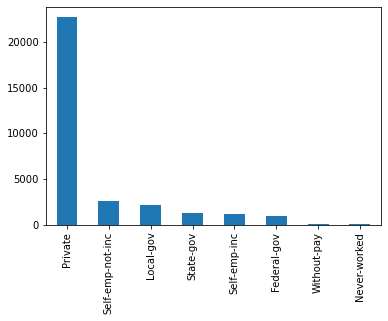

In [12]:
#É notável que as variáveis são de dois tipos, inicialmente, categóricas e numéricas. Vamos olhar um pouco melhor estas variáveis.

#Primeiro as categóricas.

Atrain['workclass'].value_counts().plot(kind='bar')

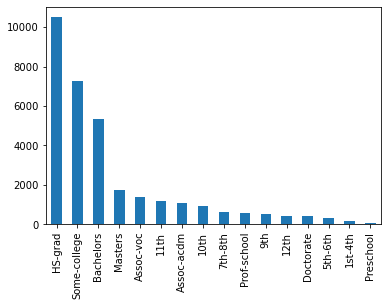

In [13]:
Atrain['education'].value_counts().plot(kind='bar')

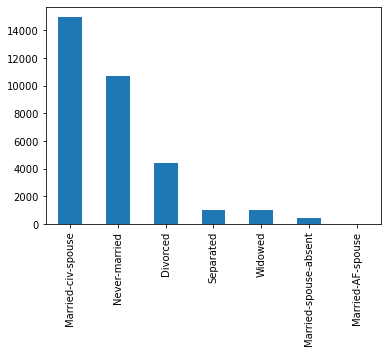

In [14]:
Atrain['marital.status'].value_counts().plot(kind='bar')

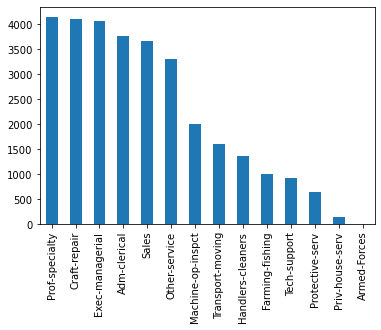

In [15]:
Atrain['occupation'].value_counts().plot(kind='bar')

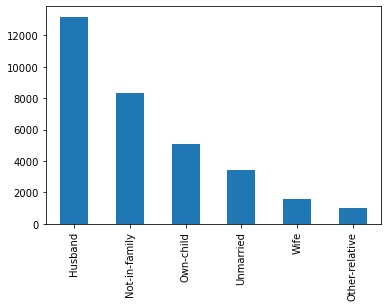

In [16]:
Atrain['relationship'].value_counts().plot(kind='bar')

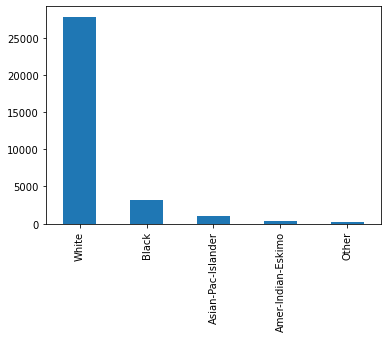

In [17]:
Atrain['race'].value_counts().plot(kind='bar')

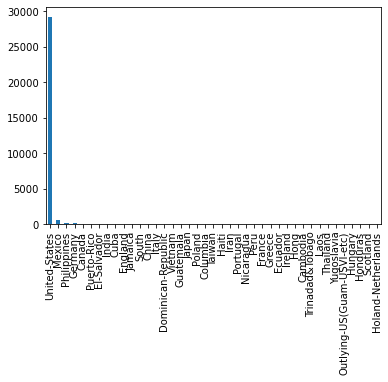

In [18]:
Atrain['native.country'].value_counts().plot(kind='bar')

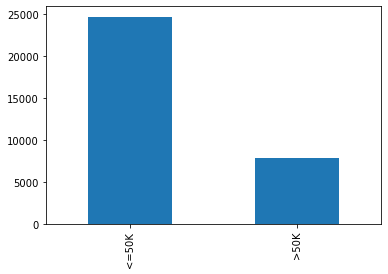

In [19]:
Atrain['income'].value_counts().plot(kind='bar')

In [20]:
#Agora as numéricas.

Atrain['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

In [21]:
Atrain['education.num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64

In [22]:
Atrain['fnlwgt'].value_counts()

164190    13
123011    13
203488    13
113364    12
126675    12
          ..
277588     1
277886     1
370045     1
114324     1
229376     1
Name: fnlwgt, Length: 21647, dtype: int64

In [23]:
Atrain['capital.gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital.gain, Length: 119, dtype: int64

In [24]:
Atrain['capital.loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital.loss, Length: 92, dtype: int64

In [25]:
Atrain['hours.per.week'].value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours.per.week, Length: 94, dtype: int64

income  <=50K  >50K
sex                
Female   9592  1179
Male    15127  6662


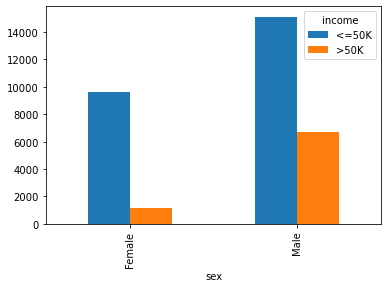

In [26]:
#Realizando algumas inferências com a variável que desejamos classificar:

tabela1 = pd.pivot_table(data = Atrain, values = 'Id', index = 'sex', columns = 'income', aggfunc = 'count')
print(tabela1)

tabela1.plot(kind='bar')

Podemos observar que homens possuem uma renda maior ('income' = >50K) que as mulheres.

income         <=50K    >50K
education                   
10th           871.0    62.0
11th          1115.0    60.0
12th           400.0    33.0
1st-4th        162.0     6.0
5th-6th        317.0    16.0
7th-8th        606.0    40.0
9th            487.0    27.0
Assoc-acdm     802.0   265.0
Assoc-voc     1021.0   361.0
Bachelors     3133.0  2221.0
Doctorate      107.0   306.0
HS-grad       8826.0  1675.0
Masters        764.0   959.0
Preschool       51.0     NaN
Prof-school    153.0   423.0
Some-college  5904.0  1387.0


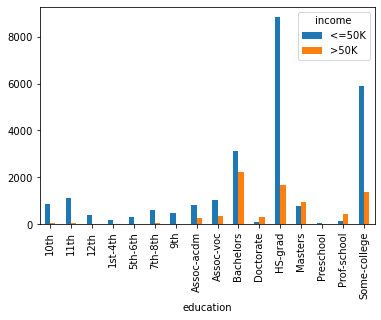

In [27]:
tabela2 = pd.pivot_table(data = Atrain, values = 'Id', index = 'education', columns = 'income', aggfunc = 'count')
print(tabela2)

tabela2.plot(kind='bar')

Agora na tabela 2 podemos observar que há um grande número de 'High School Graduate' que possuem renda menor ('income' = <=50) e os 'Bachelors' são os que possuem renda maior ('income' = >50).

income             <=50K  >50K
occupation                    
Adm-clerical        3262   507
Armed-Forces           8     1
Craft-repair        3170   929
Exec-managerial     2098  1968
Farming-fishing      879   115
Handlers-cleaners   1284    86
Machine-op-inspct   1752   250
Other-service       3158   137
Priv-house-serv      148     1
Prof-specialty      2281  1859
Protective-serv      438   211
Sales               2667   983
Tech-support         645   283
Transport-moving    1277   320


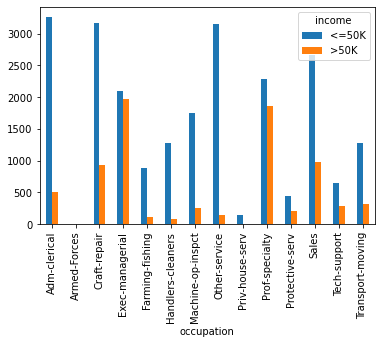

In [28]:
tabela3 = pd.pivot_table(data = Atrain, values = 'Id', index = 'occupation', columns = 'income', aggfunc = 'count')
print(tabela3)

tabela3.plot(kind='bar')

Por último, a tabela 3 está de certa forma equilibrada em rendas baixas, porém podemos destacar duas ocupações com rendas altas, Prof-specialty e Exec-managerial.

2. Preaparação dos dados

In [29]:
#Quantidade de linhas e colunas no data frame

Atrain.shape

(32560, 16)

In [30]:
#Análise detalhada(estatística) do conjunto de treino 

Atrain.describe()

,Id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,32559.500000,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,9399.406719,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,16280.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,24419.750000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,32559.500000,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,40699.250000,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,48839.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [31]:
#Retirando váriavel não importante, para cumprir nosso objetivo.

Atrain = Atrain.drop(columns=['fnlwgt'])

In [32]:
#Contagem de valores faltantes em cada uma das variáveis do conjunto de treino.

np.sum(Atrain.isna())

Id                   0
age                  0
workclass         1836
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [33]:
#Analisar as variáveis com valores faltantes

Atrain['workclass'].describe()

count       30724
unique          8
top       Private
freq        22696
Name: workclass, dtype: object

In [34]:
Atrain['occupation'].describe()

count              30717
unique                14
top       Prof-specialty
freq                4140
Name: occupation, dtype: object

In [35]:
Atrain['native.country'].describe()

count             31977
unique               41
top       United-States
freq              29169
Name: native.country, dtype: object

Podemos observar em 'native.country' e 'workclass' que a moda (top) possui uma frequência (freq) alta nos dados, já no 'occupation' nem tanto, porém podemos levar em consideração para tratar os valores faltantes.

In [36]:
#Tratando os valores faltantes.

Atrain['workclass'] = Atrain['workclass'].fillna('Private')

In [37]:
Atrain['occupation'] = Atrain['workclass'].fillna('Private')

In [38]:
Atrain['native.country'] = Atrain['workclass'].fillna('Private')

In [39]:
#Verificando se funcionou o tratamento dos valores faltantes.

np.sum(Atrain.isna())

Id                0
age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Podemos aplicar o mesmo tratamento nos dados faltantes do conjunto de teste.

In [40]:
#Retirar a váriavel não importante do conjunto de teste.

Atest = Atest.drop(columns=['fnlwgt'])

In [41]:
np.sum(Atest.isna())

Id                  0
age                 0
workclass         963
education           0
education.num       0
marital.status      0
occupation        966
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    274
dtype: int64

In [42]:
Atest['workclass'].describe()

count       15317
unique          8
top       Private
freq        11209
Name: workclass, dtype: object

In [43]:
Atest['occupation'].describe()

count              15314
unique                14
top       Prof-specialty
freq                2032
Name: occupation, dtype: object

In [44]:
Atest['native.country'].describe()

count             16006
unique               40
top       United-States
freq              14661
Name: native.country, dtype: object

In [45]:
#Tratando os valores faltantes

Atest['workclass'] = Atest['workclass'].fillna('Private')

In [46]:
Atest['occupation'] = Atest['workclass'].fillna('Private')

In [47]:
Atest['native.country'] = Atest['workclass'].fillna('Private')

In [48]:
#Da mesma forma verificamos se funcionou o tratamento.

np.sum(Atest.isna())

Id                0
age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

Agora para trazer uma melhor acurácia no nosso classificador, uma boa opção é padronizar/normalizar os dados.
Para isso vamos primeiro cuidar das variáveis não numéricas e depois as numéricas e esparsas ('capital.gain' e 'capital.loss', uma forma melhor de tratarmos estes dados, sem sofrer tanta diferença). 

In [49]:
#Importar a biblioteca sklearn, que possui um pacote para pré-processamento dos dados, que seria está etapa sendo trabalhada.

from sklearn import preprocessing

In [50]:
#Variáveis não numéricas para numéricas.

numAtrain = Atrain.apply(preprocessing.LabelEncoder().fit_transform)

numAtest = Atest.apply(preprocessing.LabelEncoder().fit_transform)

In [51]:
#Detalhamento das variáveis númericas e esparsas (antes).

numAtrain[["age","education.num","capital.gain", "capital.loss", "hours.per.week"]].describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,21.580313,9.080590,6.500645,2.053348,39.377948
std,13.635711,2.572709,23.300419,10.056712,12.144192
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,8.000000,0.000000,0.000000,39.000000
50%,20.000000,9.000000,0.000000,0.000000,39.000000
75%,31.000000,11.000000,0.000000,0.000000,44.000000
max,72.000000,15.000000,118.000000,91.000000,93.000000


In [52]:
#Variáveis Númericas

scaler = preprocessing.StandardScaler().fit(numAtrain[["age"]])
numAtrain["age"] = scaler.transform(numAtrain[["age"]])

In [53]:
scaler = preprocessing.StandardScaler().fit(numAtrain[["education.num"]])
numAtrain["education.num"] = scaler.transform(numAtrain[["education.num"]])

In [54]:
scaler = preprocessing.StandardScaler().fit(numAtrain[["hours.per.week"]])
numAtrain["hours.per.week"] = scaler.transform(numAtrain[["hours.per.week"]])

In [55]:
#Variáveis esparsas

scaler = preprocessing.RobustScaler().fit(numAtrain[["capital.gain"]])
numAtrain["capital.gain"] = scaler.transform(numAtrain[["capital.gain"]])

In [56]:
scaler = preprocessing.RobustScaler().fit(numAtrain[["capital.loss"]])
numAtrain["capital.loss"] = scaler.transform(numAtrain[["capital.loss"]])

In [57]:
#Detalhamento das variáveis númericas e esparsas (depois).

numAtrain[["age","education.num","capital.gain", "capital.loss", "hours.per.week"]].describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,3.256000e+04,3.256000e+04,32560.000000,32560.000000,3.256000e+04
mean,5.099661e-17,-3.632775e-17,6.500645,2.053348,-3.616613e-16
std,1.000015e+00,1.000015e+00,23.300419,10.056712,1.000015e+00
min,-1.582656e+00,-3.529637e+00,0.000000,0.000000,-3.242583e+00
25%,-7.759387e-01,-4.200266e-01,0.000000,0.000000,-3.112222e-02
50%,-1.158970e-01,-3.132531e-02,0.000000,0.000000,-3.112222e-02
75%,6.908207e-01,7.460773e-01,0.000000,0.000000,3.806035e-01
max,3.697677e+00,2.300883e+00,118.000000,91.000000,4.415516e+00


Agora realizando o mesmo pré-processamento no conjunto de teste.

In [58]:
#Conjunto de teste

#Detalhamento váriaveis numéricas e esparsas (antes)
numAtest[["age","education.num","capital.gain", "capital.loss", "hours.per.week"]].describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000
mean,21.767138,9.073096,5.977580,1.906450,39.332310
std,13.844978,2.567511,21.815235,9.347259,12.245513
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,8.000000,0.000000,0.000000,39.000000
50%,20.000000,9.000000,0.000000,0.000000,39.000000
75%,31.000000,11.000000,0.000000,0.000000,44.000000
max,72.000000,15.000000,112.000000,81.000000,88.000000


In [59]:
#Variáveis Númericas

scaler = preprocessing.StandardScaler().fit(numAtest[["age"]])
numAtest["age"] = scaler.transform(numAtest[["age"]])

In [60]:
scaler = preprocessing.StandardScaler().fit(numAtest[["education.num"]])
numAtest["education.num"] = scaler.transform(numAtest[["education.num"]])

In [61]:
scaler = preprocessing.StandardScaler().fit(numAtest[["hours.per.week"]])
numAtest["hours.per.week"] = scaler.transform(numAtest[["hours.per.week"]])

In [62]:
#Variáveis esparsas

scaler = preprocessing.RobustScaler().fit(numAtest[["capital.gain"]])
numAtest["capital.gain"] = scaler.transform(numAtest[["capital.gain"]])

In [63]:
scaler = preprocessing.RobustScaler().fit(numAtest[["capital.loss"]])
numAtest["capital.loss"] = scaler.transform(numAtest[["capital.loss"]])

In [64]:
#Detalhamento das variáveis númericas e esparsas (depois).

numAtest[["age","education.num","capital.gain", "capital.loss", "hours.per.week"]].describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,1.628000e+04,1.628000e+04,16280.000000,16280.000000,1.628000e+04
mean,9.847433e-17,1.293198e-16,5.977580,1.906450,-2.805926e-16
std,1.000031e+00,1.000031e+00,21.815235,9.347259,1.000031e+00
min,-1.572253e+00,-3.533918e+00,0.000000,0.000000,-3.212076e+00
25%,-7.777165e-01,-4.179646e-01,0.000000,0.000000,-2.713809e-02
50%,-1.276414e-01,-2.847040e-02,0.000000,0.000000,-2.713809e-02
75%,6.668950e-01,7.505180e-01,0.000000,0.000000,3.811873e-01
max,3.628349e+00,2.308495e+00,112.000000,81.000000,3.974450e+00


3. Classificador KNN

In [65]:
#Importar as bibliotecas a serem utilizadas

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

Agora iremos verificar qual o melhor valor de k para se utilizar na predição. Atráves do cálculo da acurácia de cada score, será obtido uma média destes valores e assim um score para cada K.

In [66]:
#Os conjuntos organizados nas demais variáveis (XAtrain) e a variável que queremos classificar (YAtrain)

XAtrain = numAtrain[['age', 'workclass', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race','sex','capital.gain', 'capital.loss','hours.per.week','native.country']]

YAtrain = numAtrain.income

In [67]:
#Escolhi verificar 30 vizinhos próximos

final_score = []
melhorScore = 0
melhork = 0


for k in range(1,31):
    
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, XAtrain, YAtrain) 
    
    mScore = np.mean(scores)
    
    final_score.append(mScore)
    
    print('K atual: ', k)
    print('Score: ', mScore)
    
    if mScore > melhorScore:
        
        melhorScore = mScore
        melhorK = k
    
   
    print('Melhor score: ', melhorScore)
    print('Melhor K: ', melhorK)
    print('')
    

K atual:  1
Score:  0.8170147420147419
Melhor score:  0.8170147420147419
Melhor K:  1

K atual:  2
Score:  0.8378992628992629
Melhor score:  0.8378992628992629
Melhor K:  2

K atual:  3
Score:  0.8377457002457003
Melhor score:  0.8378992628992629
Melhor K:  2

K atual:  4
Score:  0.8445024570024572
Melhor score:  0.8445024570024572
Melhor K:  4

K atual:  5
Score:  0.8452088452088452
Melhor score:  0.8452088452088452
Melhor K:  5

K atual:  6
Score:  0.8503685503685505
Melhor score:  0.8503685503685505
Melhor K:  6

K atual:  7
Score:  0.8484336609336609
Melhor score:  0.8503685503685505
Melhor K:  6

K atual:  8
Score:  0.85
Melhor score:  0.8503685503685505
Melhor K:  6

K atual:  9
Score:  0.8492628992628992
Melhor score:  0.8503685503685505
Melhor K:  6

K atual:  10
Score:  0.8501842751842752
Melhor score:  0.8503685503685505
Melhor K:  6

K atual:  11
Score:  0.8491707616707617
Melhor score:  0.8503685503685505
Melhor K:  6

K atual:  12
Score:  0.8508292383292384
Melhor score:  

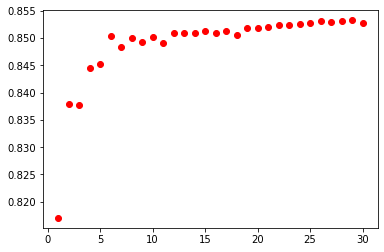

In [68]:
#Visualização dos valores de K obtidos

plt.scatter(range(1,31), final_score, color = 'red')

Como verificado, o melhor k é o 29. Então é definido os valores para o classificador.

In [69]:
knn = KNeighborsClassifier(n_neighbors = 29)

knn.fit(XAtrain, YAtrain)

KNeighborsClassifier(n_neighbors=29)

In [71]:
XAtest = numAtest[['age', 'workclass', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race','sex','capital.gain', 'capital.loss','hours.per.week','native.country']]

In [72]:
knn = KNeighborsClassifier(n_neighbors = 29)

In [73]:
knn.fit(XAtrain,YAtrain)

KNeighborsClassifier(n_neighbors=29)

In [74]:
predicao = knn.predict(XAtest)
print(predicao)

[0 1 0 ... 0 1 1]


In [75]:
#Predição resultou com 'income' numérico, então precisa-se transformar de volta para não numérica, afim de ter um melhor entendimento e visualização da predição.
predicao_final = []

for i in range(len(predicao)):
    if (predicao[i] == 0):
        predicao_final.append('<=50K')
    else:
        predicao_final.append('>50K')

In [76]:
#Por fim cria-se um data frame para a predição e o converte para um arquivo csv a ser submetido.


Predicao_DF = pd.DataFrame(predicao_final, columns = ['income'])

Predicao_DF.to_csv("submission.csv", index = True, index_label = 'Id')